## Skill-Based Career Prediction and Market Insights Using Machine Learning and Hollands Code

In [1]:
from visualisation import get_top_5_matrix_codes, create_interactive_wage_plot,create_interactive_job_prefix_plot
from visualisation import riasec_prediction_model, get_top_5_predictions
from visualisation import plot_education_distribution
from data_preprocessing import load_and_clean_skills_occupation_data, load_and_clean_wage_data
from data_preprocessing import load_and_clean_skills_6_2_data
from holland_code_model import train_random_forest_model
import panel as pn

In [2]:
common_occupation_df, skills_6_1 = load_and_clean_skills_occupation_data()
wage_data_filepath = "project_data/oesm23nat/national_M2023_dl.xlsx"
wage_2023 = load_and_clean_wage_data(wage_data_filepath)

### Holland's Personality Type Mapping
https://www.careerkey.org/fit/personality/holland-code-assessment-riasec


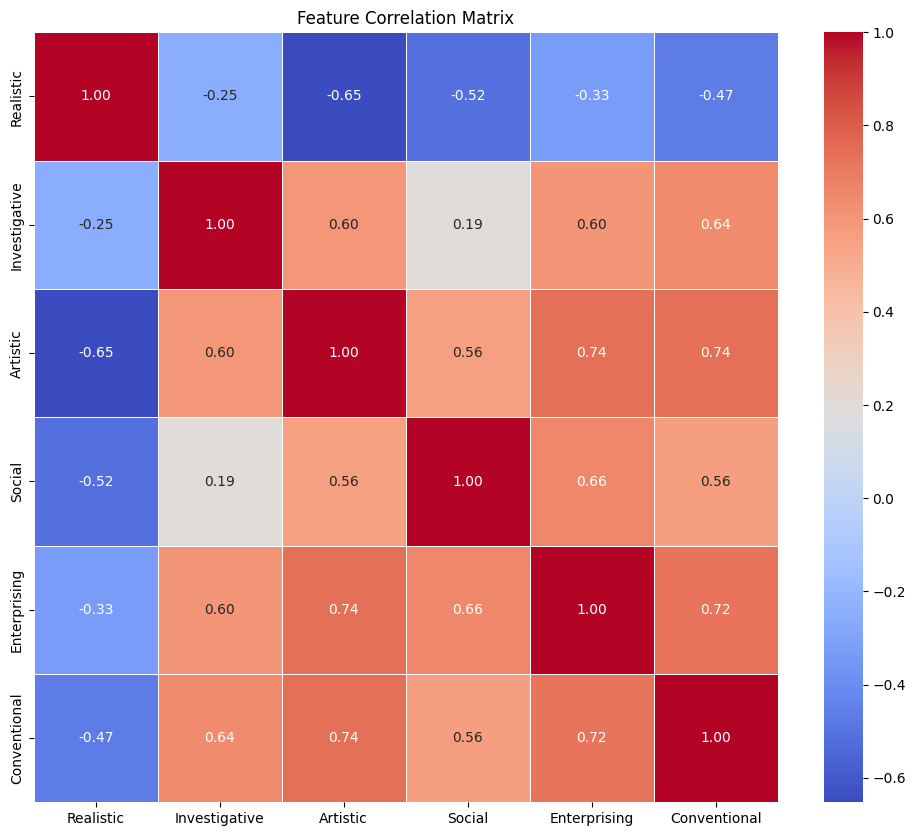


Model Accuracy: 0.60
Training set size: 696
Testing set size: 136

Feature Importances:
         Feature  Importance
0      Realistic    0.196399
3         Social    0.189346
5   Conventional    0.162044
1  Investigative    0.154639
2       Artistic    0.149055
4   Enterprising    0.148517

Model Top-5 Accuracy: 0.90
Sample 1:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.83)), (np.int64(11), np.float64(0.04333333333333334)), (np.int64(7), np.float64(0.03)), (np.int64(9), np.float64(0.03)), (np.int64(1), np.float64(0.02))]
Sample 2:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(0), np.float64(0.6766666666666665)), (np.int64(16), np.float64(0.11)), (np.int64(15), np.float64(0.08)), (np.int64(14), np.float64(0.05)), (np.int64(1), np.float64(0.03333333333333333))]
Sample 3:
  True Label: 0
  Top 5 Predictions (Class, Confidence): [(np.int64(7), np.float64(0.35)), (np.int64(0), np.float64(0.25)), (np.int64(1), np.float64(0.21)),

In [3]:
skills_6_2 = load_and_clean_skills_6_2_data()
train_random_forest_model(skills_6_2)

### RIASEC Mapping (Realistic,Investigative,Artistic,Social,Enterprising,Conventional)

							 RIASEC Mapping 							


Button(description='Submit', style=ButtonStyle())

Waiting for user input...



Top 5 predicted target labels for the new data:
1: Office and administrative support occupations (Probability: 0.1700)
2: Architecture and engineering occupations (Probability: 0.1500)
3: Management occupations (Probability: 0.1400)
4: Life, physical, and social science occupations (Probability: 0.1100)
5: Computer and mathematical occupations (Probability: 0.1000)

Most likely job title: Office and administrative support occupations


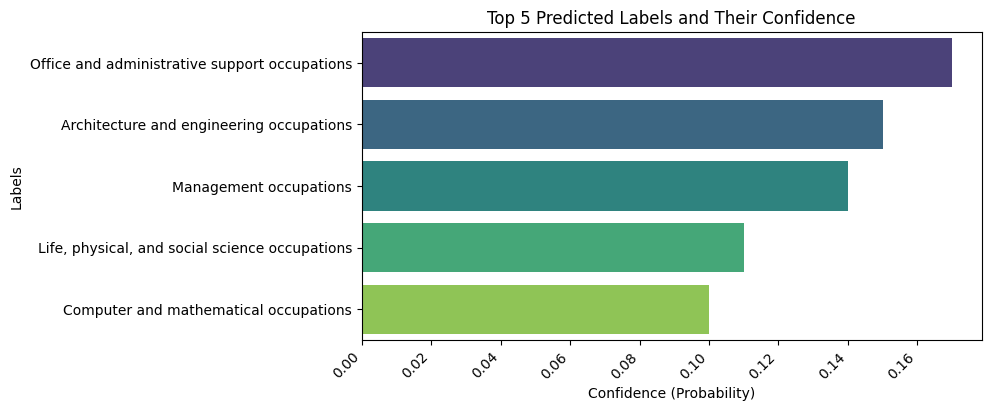

In [4]:
riasec_prediction_model(skills_6_1)

In [5]:
top_5_labels = get_top_5_predictions()
top_5_labels

['Office and administrative support occupations',
 'Architecture and engineering occupations',
 'Management occupations',
 'Life, physical, and social science occupations',
 'Computer and mathematical occupations']

### Top 10 Job Titles by Annual Wage and Current Employment Numbers

In [6]:
# require the output from model to be used instead of this.
# top_5_labels_global = ['Office and administrative support occupations',
#        'Building and grounds cleaning and maintenance occupations',
#        'Business and financial operations occupations',
#        'Educational instruction and library occupations',
#        'Food preparation and serving related occupations']

In [7]:
pn.extension()
top_5_codes = get_top_5_matrix_codes(skills_6_1, top_5_labels)
result_widget_display_filter = skills_6_1['2023 National Employment Matrix code'].str.startswith(tuple(top_5_codes))
result_widget_name = skills_6_1[result_widget_display_filter]['2023 National Employment Matrix title'].str.strip().values
create_interactive_wage_plot(skills_6_1, result_widget_name)

BokehModel(combine_events=True, render_bundle={'docs_json': {'5566cebd-9249-44b2-8db8-a7ca296079dc': {'version…

### Educational Distribution of Employees for Selected Occupation - 2023

In [8]:
columns_selection = ['2023 National Employment Matrix title','2023 National Employment Matrix code']
skills_6_1_selected = skills_6_1[columns_selection]
skills_6_1_selected = skills_6_1_selected.drop(index=0).reset_index(drop=True)

skills_6_2 = load_and_clean_skills_6_2_data()
plot_education_distribution(skills_6_2, skills_6_1_selected)

BokehModel(combine_events=True, render_bundle={'docs_json': {'932f9d4a-c12e-4a45-89c7-8ac999dd971f': {'version…

### Top 10 Jobs by Annual Wage in 2023 Across Selected Occupation Groups

In [9]:
create_interactive_job_prefix_plot(skills_6_1, top_5_codes)

BokehModel(combine_events=True, render_bundle={'docs_json': {'0b28d04e-0534-44e7-9524-4469201efbc2': {'version…

### Geographic Distribution of Employees Across Different Industries

In [10]:
# Make sure the port 8058 is free
!python employees_across_sectors.py

Dash is running on http://127.0.0.1:8058/

 * Serving Flask app 'employees_across_sectors'
 * Debug mode: on
^C


### Top 5 Employment and Wage Changes Across Industries

In [11]:
# Make sure the port 8059 is free
!python employment_and_wage_change.py

Dash is running on http://127.0.0.1:8059/

 * Serving Flask app 'employment_and_wage_change'
 * Debug mode: on
^C


### Top 10 Jobs with the Highest Employment Change: Comparing 2023 and Projected 2029 Values

In [12]:
# Make sure the port 8055 is free
!python work_trends_2029.py

Dash is running on http://127.0.0.1:8055/

 * Serving Flask app 'work_trends_2029'
 * Debug mode: on
^C
